# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Parameters-Learn" data-toc-modified-id="Parameters-Learn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parameters Learn</a></div><div class="lev2 toc-item"><a href="#Example:-Earthquake" data-toc-modified-id="Example:-Earthquake-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example: Earthquake</a></div><div class="lev3 toc-item"><a href="#Learn-with-QuantumFog" data-toc-modified-id="Learn-with-QuantumFog-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Learn with QuantumFog</a></div><div class="lev3 toc-item"><a href="#Example-from-'learning.NetParamsLner'-class" data-toc-modified-id="Example-from-'learning.NetParamsLner'-class-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Example from 'learning.NetParamsLner' class</a></div><div class="lev3 toc-item"><a href="#Learn-with-bn.fit-in-bnlearn" data-toc-modified-id="Learn-with-bn.fit-in-bnlearn-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Learn with bn.fit in bnlearn</a></div>

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from graphviz import Digraph, Source

from learning.NaiveBayesLner import *
from learning.MB_GrowShrinkLner import *
from learning.MB_IAMB_Lner import *
from learning.HillClimbingLner import *
from learning.NetParamsLner import *

import rpy2
%load_ext rpy2.ipython
%R library("bnlearn");
%R library("Rgraphviz");

# Parameters Learn

## Example: Earthquake

Earthquake
Burglary
Alarm
JohnCalls
MaryCalls


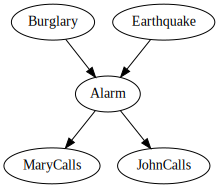

In [2]:
path_csv = '../learning/training_data_c/earthquake.csv'
path_bif = '../examples_cbnets/earthquake.bif'
path_dot = '../examples_cbnets/earthquake.dot'
%Rpush path_csv
test_dot = 'test.dot'
states_df = pd.read_csv(path_csv, dtype=str)
for item in states_df.columns.values:
    print(item)
Source(open(path_dot).read())

###  Learn with QuantumFog

Get wrong result with $\alpha \approx 5/n$, change $\alpha$ to $10/n$

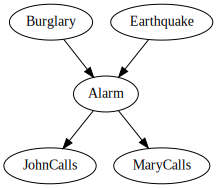

In [3]:
alpha = 10 / len(states_df.index)
lnr_gs = MB_GrowShrinkLner(states_df, alpha, verbose=False)
lnr_iamb = MB_IAMB_Lner(states_df, alpha, verbose=False)
lnr_gs.bnet.write_dot(test_dot) 
Source(open(test_dot).read())

How to learn parameters from above networks?

lnr_gs.learn_all_bnet_pots() return an error?

In [5]:
# some steps missing ? ...
lnr_gs = NetParamsLner(False, lnr_gs.bnet, states_df, degs_df = None)
# lnr_gs.learn_all_bnet_pots()

### Example from 'learning.NetParamsLner' class

In [6]:
is_quantum = False
bnet = BayesNet.read_bif(path_bif, is_quantum)
bnet_emp = BayesNet.read_bif(path_bif, is_quantum)

lnr = NetParamsLner(is_quantum, bnet_emp, states_df)
lnr.learn_all_bnet_pots()
lnr.compare_true_and_emp_pots(bnet, bnet_emp)


node= JohnCalls
true:
['Alarm', 'JohnCalls']
[[ 0.9   0.1 ]
 [ 0.05  0.95]]
empirical:
['Alarm', 'JohnCalls']
[[ 0.93137255  0.06862745]
 [ 0.04859126  0.95140874]]

node= Alarm
true:
['Burglary', 'Earthquake', 'Alarm']
[[[ 0.95   0.05 ]
  [ 0.29   0.71 ]]

 [[ 0.94   0.06 ]
  [ 0.001  0.999]]]
empirical:
['Burglary', 'Earthquake', 'Alarm']
[[[ 1.          0.        ]
  [ 0.24528302  0.75471698]]

 [[ 0.95294118  0.04705882]
  [ 0.00123457  0.99876543]]]

node= Burglary
true:
['Burglary']
[ 0.01  0.99]
empirical:
['Burglary']
[ 0.011  0.989]

node= Earthquake
true:
['Earthquake']
[ 0.02  0.98]
empirical:
['Earthquake']
[ 0.0174  0.9826]

node= MaryCalls
true:
['Alarm', 'MaryCalls']
[[ 0.7   0.3 ]
 [ 0.01  0.99]]
empirical:
['Alarm', 'MaryCalls']
[[ 0.71568627  0.28431373]
 [ 0.01020825  0.98979175]]


### Learn with bn.fit in bnlearn

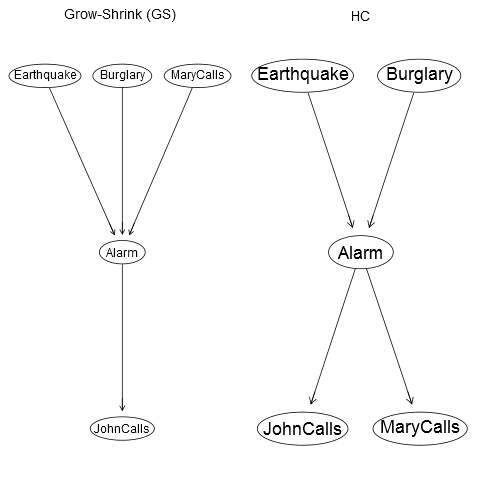

In [7]:
%%R
states_df <- read.csv(file=path_csv, header=TRUE, sep=",", colClasses = "factor")
bn.gs <- gs(states_df, undirected = FALSE);
bn.hc <- hc(states_df);
par(mfrow = c(1,2))
graphviz.plot(bn.gs, shape = "ellipse", main = "Grow-Shrink (GS)")
graphviz.plot(bn.hc, shape = "ellipse", main = "HC")

In [8]:
%%R
marks.fit2 <- bn.fit(bn.hc, data = states_df)
marks.fit2 <- bn.fit(bn.gs, data = states_df)